# BINARY CLASSIFER 
TRUCK AND SHIP 

#### IMPORTING LIBRARIES AND DATASET 

In [43]:
# importing libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# loading datasets
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [25]:
y_test.shape

(10000, 1)

In [56]:
# reshaping y_train to 1d array
y_train = y_train.reshape(-1)

In [51]:
# define the classes in cifar 10 dataset
classes_cifar= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [57]:
# ploting funciton for cifar-10 
def plot_sample_cifar(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes_cifar[y[index]])

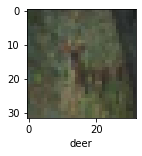

In [58]:
plot_sample_cifar(X_train,y_train,10)

## DATA PREPARATION

DEFINING CLASSES

In [80]:
# specify the classes for the binary classification
classes = ['ship', 'truck']

PREPARING TRAIN DATA SET <br> 
Training data set is prepared by filtering truck and ship photos and results from cifar-10 dataset

In [101]:
# preparing data for binary classifier ( truck and ship )

# get index of all ships and truck
index_ship = []
index_truck = []

for i in range(len(y_train)):
  if (y_train[i] == 8):
    index_ship.append(i)
  elif (y_train[i] == 9):
    index_truck.append(i)

# shifiting the ship & truck to the training dataset
train_x = []
train_y = []
j = 0
k = 0
# for i in range(len(index_ship)+len(index_truck)):
#   if i%2 == 0:
#     train_x.append(X_train[index_ship[j]])
#     train_y.append(0)
#     j += 1
#   else:
#     train_x.append(X_train[index_truck[k]])
#     train_y.append(1)
#     k += 1   

# data set test
for i in range(len(index_ship)):
  train_x.append(X_train[index_ship[i]])
  train_y.append(0)

for i in range(len(index_truck)):
  train_x.append(X_train[index_truck[i]])
  train_y.append(1)

# convert to numpy array
train_x = np.array(train_x)
train_y =np.array(train_y, dtype = int)
train_x.shape 


(10000, 32, 32, 3)

In [115]:
train_y[len(index_ship):]

array([1, 1, 1, ..., 1, 1, 1])

NORMALISING TRAINING DATA 

In [84]:
# normalising train and test 
train_x = train_x / 255
train_y = train_y / 255

PREPARING TEST DATA SIMILARLY

In [85]:
# preparing the test data similar to the training data 

# get index of all ships and truck
index_ship_test = []
index_truck_test = []

for i in range(len(y_test)):
  if (y_test[i] == 8):
    index_ship_test.append(i)
  elif (y_test[i] == 9):
    index_truck_test.append(i)

# shifiting the ship & truck to the testing dataset
test_x = []
test_y = []
j = 0
k = 0
for i in range(len(index_ship_test)+len(index_truck_test)):
  if i%2 == 0:
    test_x.append(X_test[index_ship_test[j]])
    test_y.append(0)
    j += 1
  else:
    test_x.append(X_test[index_truck_test[k]])
    test_y.append(1)
    k += 1

# convert the python list to tensors
test_x = np.array(test_x)
test_y = np.array(test_y,dtype= int)

PLOTING FUNCTION

In [59]:
# ploting function for classifer
def plot_image(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

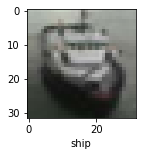

In [102]:
plot_image(train_x, train_y, 11)

## MODEL 

BINARY CLASSIFIER - CNN

In [141]:
# cnn model for binary lassification

binary_classifier = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [142]:
# compiling the model
binary_classifier.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## TRAINING THE MODEL

In [143]:
# training the model by calling fit method
binary_classifier.fit(train_x,train_y, epochs=5)

Epoch 1/5
313/313 [==============================] - 9s 27ms/step - loss: 1.7603 - accuracy: 0.7815
Epoch 2/5
313/313 [==============================] - 9s 27ms/step - loss: 0.3038 - accuracy: 0.8769
Epoch 3/5
313/313 [==============================] - 8s 27ms/step - loss: 0.2401 - accuracy: 0.9046
Epoch 4/5
313/313 [==============================] - 9s 27ms/step - loss: 0.2040 - accuracy: 0.9192
Epoch 5/5
313/313 [==============================] - 8s 27ms/step - loss: 0.1743 - accuracy: 0.9342


In [42]:
test_y

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [148]:
binary_classifier.evaluate(test_x,test_y)

63/63 [==============================] - 1s 9ms/step - loss: 0.2231 - accuracy: 0.9140


[0.22312423586845398, 0.9139999747276306]

## TESING THE MODEL

In [156]:
print(pred[len(index_ship_test)+1],"----> ",test_y[len(index_ship_test)+1])

print(pred[0],"----> ",test_y[0])

[0.0145554 0.9854446] ---->  1
[0.9389714  0.06102861] ---->  0


In [152]:
# making predictions 
pred = binary_classifier.predict(test_x)

# making the model to choose the classes 
pred_classes = [np.argmax(element) for element in pred]
pred_classes[:5]

In [157]:
pred_classes = [np.argmax(element) for element in pred]
pred_classes[:5]

[0, 1, 0, 1, 0]

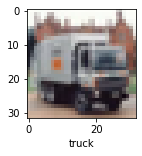

In [159]:
plot_image(test_x,pred_classes,1)

## Saving the model

In [162]:
tf.keras.models.save_model(cnn,"/content/drive/MyDrive/binary_classifier_1.hdf5")